In [2]:
!pip install pandas_datareader

In [65]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [31]:
start = (2019,8,5)  
start = datetime.datetime(*start)  
end = datetime.date.today() 

df = pdr.DataReader('005930.KS', 'yahoo', start, end)
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-05,44600.0,43600.0,44350.0,43950.0,14214086.0,40248.046875
2019-08-06,43800.0,42500.0,42500.0,43500.0,15083824.0,39835.957031
2019-08-07,43900.0,43100.0,43600.0,43200.0,10002533.0,39561.226562
2019-08-08,43500.0,42650.0,43250.0,42650.0,16926881.0,39057.562500
2019-08-09,43350.0,43050.0,43250.0,43150.0,9685147.0,39515.437500


<AxesSubplot:xlabel='Date'>

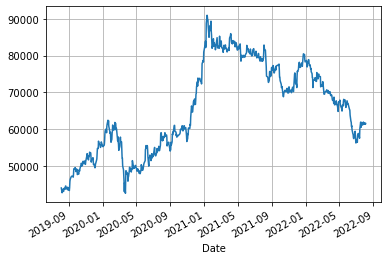

In [32]:
df.Close.plot(grid=True)

In [33]:
X = df.drop(columns='Volume')
y = df.iloc[:, 5:6]
print(X)
print(y)

               High      Low     Open    Close     Adj Close
Date                                                        
2019-08-05  44600.0  43600.0  44350.0  43950.0  40248.046875
2019-08-06  43800.0  42500.0  42500.0  43500.0  39835.957031
2019-08-07  43900.0  43100.0  43600.0  43200.0  39561.226562
2019-08-08  43500.0  42650.0  43250.0  42650.0  39057.562500
2019-08-09  43350.0  43050.0  43250.0  43150.0  39515.437500
...             ...      ...      ...      ...           ...
2022-08-01  61700.0  60300.0  61000.0  61300.0  61300.000000
2022-08-02  61900.0  61000.0  61200.0  61700.0  61700.000000
2022-08-03  61600.0  61000.0  61600.0  61300.0  61300.000000
2022-08-04  61800.0  61200.0  61700.0  61500.0  61500.000000
2022-08-05  61900.0  61200.0  61700.0  61500.0  61500.000000

[741 rows x 5 columns]
               Adj Close
Date                    
2019-08-05  40248.046875
2019-08-06  39835.957031
2019-08-07  39561.226562
2019-08-08  39057.562500
2019-08-09  39515.437500
...     

In [34]:
#학습이 잘되기 위해 데이터 정규화 
#StandardScaler	각 특징의 평균을 0, 분산을 1이 되도록 변경
#MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 변경

from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y)

In [46]:
X_ss

array([[-1.72118524, -1.72137113, -1.70229293, -1.73394808, -1.73691421],
       [-1.78509976, -1.81007658, -1.85080994, -1.77014006, -1.76820701],
       [-1.77711045, -1.76169179, -1.76250253, -1.79426805, -1.78906918],
       ...,
       [-0.3630017 , -0.31821217, -0.31747223, -0.33854616, -0.13829525],
       [-0.34702307, -0.30208391, -0.30944428, -0.32246083, -0.12310788],
       [-0.33903375, -0.30208391, -0.30944428, -0.32246083, -0.12310788]])

In [40]:
X_train = X_ss[:550, :]
X_test = X_ss[550:, :]
y_train = y_mm[:550, :]
y_test = y_mm[550:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (550, 5) (550, 1)
Testing Shape (191, 5) (191, 1)


In [56]:
#torch로 만들어주기
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors

tensor([[-1.7212, -1.7214, -1.7023, -1.7339, -1.7369],
        [-1.7851, -1.8101, -1.8508, -1.7701, -1.7682],
        [-1.7771, -1.7617, -1.7625, -1.7943, -1.7891],
        ...,
        [ 0.3560,  0.3672,  0.3488,  0.3773,  0.4542],
        [ 0.4279,  0.4398,  0.4050,  0.4496,  0.5215],
        [ 0.3880,  0.4076,  0.4372,  0.3692,  0.4467]])

In [57]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([550, 1, 5]) torch.Size([550, 1])
Testing Shape torch.Size([191, 1, 5]) torch.Size([191, 1])


In [70]:
pip3 install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio===0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

SyntaxError: invalid non-printable character U+00A0 (3963357024.py, line 1)

In [72]:
torch.cuda.is_available()

False

In [76]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name(0))

AssertionError: Torch not compiled with CUDA enabled

In [61]:
device = torch.device("cpu")

In [63]:
class LSTM1(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM1, self).__init__()
    self.num_classes = num_classes #number of classes
    self.num_layers = num_layers #number of layers
    self.input_size = input_size #input size
    self.hidden_size = hidden_size #hidden state
    self.seq_length = seq_length #sequence length
 
    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm
    self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
    self.fc = nn.Linear(128, num_classes) #fully connected last layer
    self.relu = nn.ReLU() 

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #hidden state
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #internal state   
    # Propagate input through LSTM

    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
   
    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
    out = self.relu(hn)
    out = self.fc_1(out) #first Dense
    out = self.relu(out) #relu
    out = self.fc(out) #Final Output
   
    return out 

In [77]:
num_epochs = 30000 #1000 epochs
learning_rate = 0.00001 #0.001 lr

input_size = 5 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [78]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]).to(device)

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)  # adam optimizer

In [79]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final.to(device)) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = loss_function(outputs, y_train_tensors.to(device))

  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.36278
Epoch: 100, loss: 0.33719
Epoch: 200, loss: 0.31341
Epoch: 300, loss: 0.29136
Epoch: 400, loss: 0.27095
Epoch: 500, loss: 0.25211
Epoch: 600, loss: 0.23474
Epoch: 700, loss: 0.21878
Epoch: 800, loss: 0.20414
Epoch: 900, loss: 0.19075
Epoch: 1000, loss: 0.17855
Epoch: 1100, loss: 0.16747
Epoch: 1200, loss: 0.15744
Epoch: 1300, loss: 0.14838
Epoch: 1400, loss: 0.14023
Epoch: 1500, loss: 0.13292
Epoch: 1600, loss: 0.12639
Epoch: 1700, loss: 0.12058
Epoch: 1800, loss: 0.11544
Epoch: 1900, loss: 0.11090
Epoch: 2000, loss: 0.10693
Epoch: 2100, loss: 0.10346
Epoch: 2200, loss: 0.10045
Epoch: 2300, loss: 0.09785
Epoch: 2400, loss: 0.09562
Epoch: 2500, loss: 0.09372
Epoch: 2600, loss: 0.09209
Epoch: 2700, loss: 0.09072
Epoch: 2800, loss: 0.08956
Epoch: 2900, loss: 0.08857
Epoch: 3000, loss: 0.08773
Epoch: 3100, loss: 0.08702
Epoch: 3200, loss: 0.08641
Epoch: 3300, loss: 0.08587
Epoch: 3400, loss: 0.08539
Epoch: 3500, loss: 0.08495
Epoch: 3600, loss: 0.08455
Epoch: 3700, 

Epoch: 29700, loss: 0.00056
Epoch: 29800, loss: 0.00056
Epoch: 29900, loss: 0.00055


In [80]:
df_X_ss = ss.transform(df.drop(columns='Volume'))
df_y_mm = mm.transform(df.iloc[:, 5:6])

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))

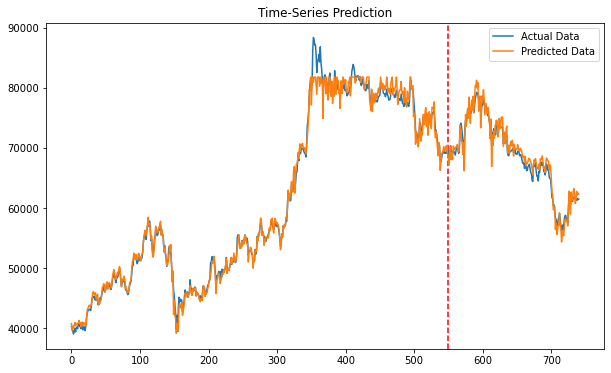

In [84]:
train_predict = lstm1(df_X_ss.to(device))#forward pass
data_predict = train_predict.data.detach().cpu().numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=550, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actual Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 